In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df = pd.read_csv('C:\\Users\\Win\\Desktop\\master\\term 2\\Machine learning\\ECommerce_consumer behaviour.csv')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [13]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [14]:
#the number of missing values
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

this dataset has missingvalue,let's fill it

In [3]:
df.fillna(0, inplace = True)

In [16]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,0.0,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,0.0,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,0.0,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,0.0,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,0.0,83,5,0,4,produce,fresh vegetables


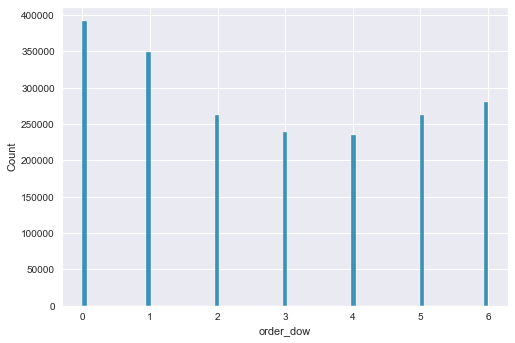

In [17]:
sns.set_style('darkgrid')
sns.histplot(df['order_dow'])
plt.savefig('1')


We can see that the highest number of orders  are on Mondays and then Tuesdays. We see that it decreases during the week and increases slightly at the end of the week.

Time of day,when the order was made:

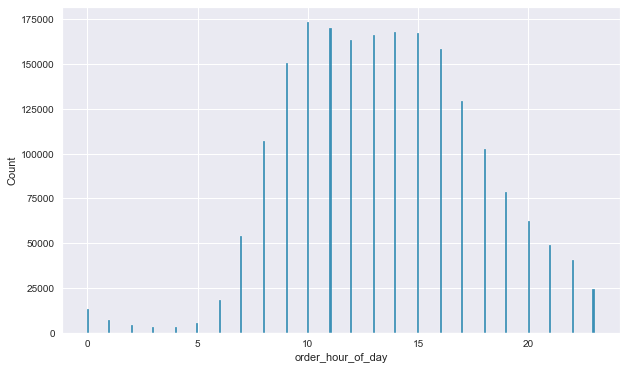

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(df['order_hour_of_day'])
plt.savefig('2')

 As can be seen in the chart above, the highest number of orders occurs around 10:00 to 16:00.

In [4]:
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'The order was made in the morning'
    if x in [13,14,15,16,17]:
        return 'The order was made in the afternoon'
    if x in [18,19,20,21,22]:
        return 'The order was made in the evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'The order was made at night'
    return x



df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125,1,2,18,0.0,17,1,0,13,pantry,baking ingredients,The order was made in the evening
1,2425083,49125,1,2,18,0.0,91,2,0,16,dairy eggs,soy lactosefree,The order was made in the evening
2,2425083,49125,1,2,18,0.0,36,3,0,16,dairy eggs,butter,The order was made in the evening
3,2425083,49125,1,2,18,0.0,83,4,0,4,produce,fresh vegetables,The order was made in the evening
4,2425083,49125,1,2,18,0.0,83,5,0,4,produce,fresh vegetables,The order was made in the evening


The time when the order was made by day and time of day:

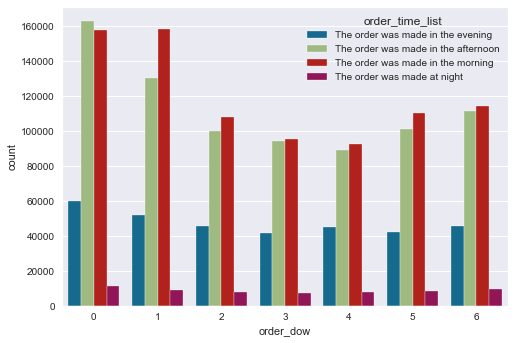

In [20]:
sns.countplot(x = 'order_dow',data = df, hue = 'order_time_list')
plt.savefig('3')

The number of orders that users have made:

In [21]:
df.groupby('order_number')['user_id'].agg(['count'])

,count
order_number,
1,124342
2,122397
3,120627
4,118573
5,105482
...,...
96,1051
97,834
98,964


In [5]:
def order_number_group(x):
    if x <= 20 :
        x= '1-20 orders'
    elif x >20 and x <=40:
        x= '21-40 orders'
    elif x >40 and x <=60:
        x= '41-60 orders'
    elif x >60 and x <=80:
        x= '61-80 orders'
    else:
        x= '81-100 orders'
    return x

df['order_number_group']=df['order_number'].apply(order_number_group)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,order_number_group
0,2425083,49125,1,2,18,0.0,17,1,0,13,pantry,baking ingredients,The order was made in the evening,1-20 orders
1,2425083,49125,1,2,18,0.0,91,2,0,16,dairy eggs,soy lactosefree,The order was made in the evening,1-20 orders
2,2425083,49125,1,2,18,0.0,36,3,0,16,dairy eggs,butter,The order was made in the evening,1-20 orders
3,2425083,49125,1,2,18,0.0,83,4,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders
4,2425083,49125,1,2,18,0.0,83,5,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders


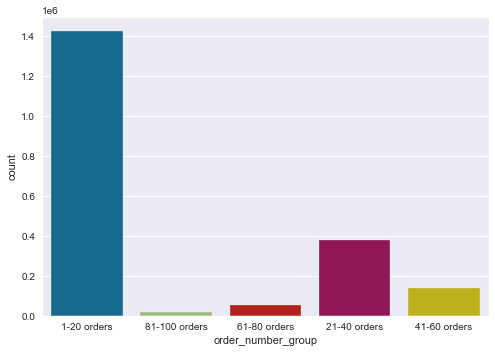

In [115]:
sns.countplot(x = 'order_number_group', data = df)
plt.savefig('4')

popular products from users:

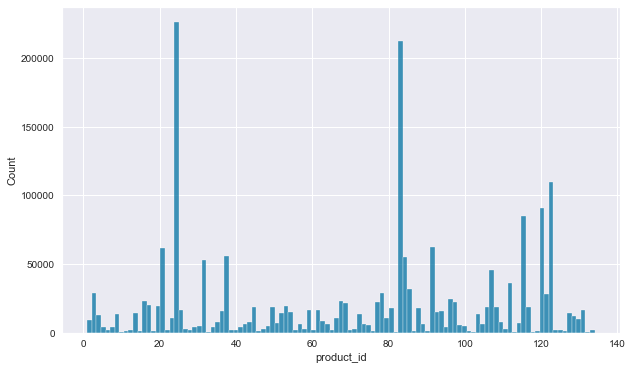

In [24]:
plt.figure(figsize = (10,6))
sns.histplot(df['product_id'])
plt.savefig('5')

In [27]:
df[df['product_id'] == 24 ]['product_name']

10         fresh fruits
14         fresh fruits
15         fresh fruits
16         fresh fruits
19         fresh fruits
               ...     
2019403    fresh fruits
2019404    fresh fruits
2019453    fresh fruits
2019466    fresh fruits
2019495    fresh fruits
Name: product_name, Length: 226039, dtype: object

In [28]:
df[df['product_id'] == 83]['product_name']

3          fresh vegetables
4          fresh vegetables
11         fresh vegetables
23         fresh vegetables
24         fresh vegetables
                 ...       
2019465    fresh vegetables
2019486    fresh vegetables
2019487    fresh vegetables
2019488    fresh vegetables
2019496    fresh vegetables
Name: product_name, Length: 212611, dtype: object

In [26]:
df['product_name'].value_counts()

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

How many days have passed since the pre-order:

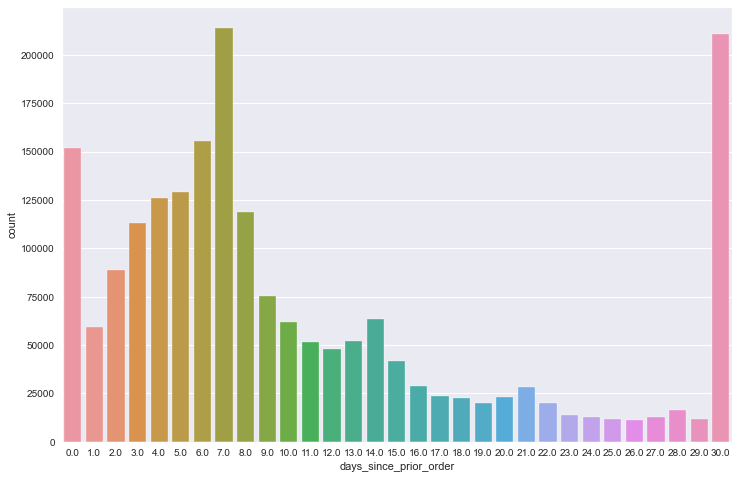

In [29]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'days_since_prior_order', data = df)
plt.savefig('6')

Reordereds:

In [30]:
df['reordered'].value_counts()

1    1190986
0     828515
Name: reordered, dtype: int64

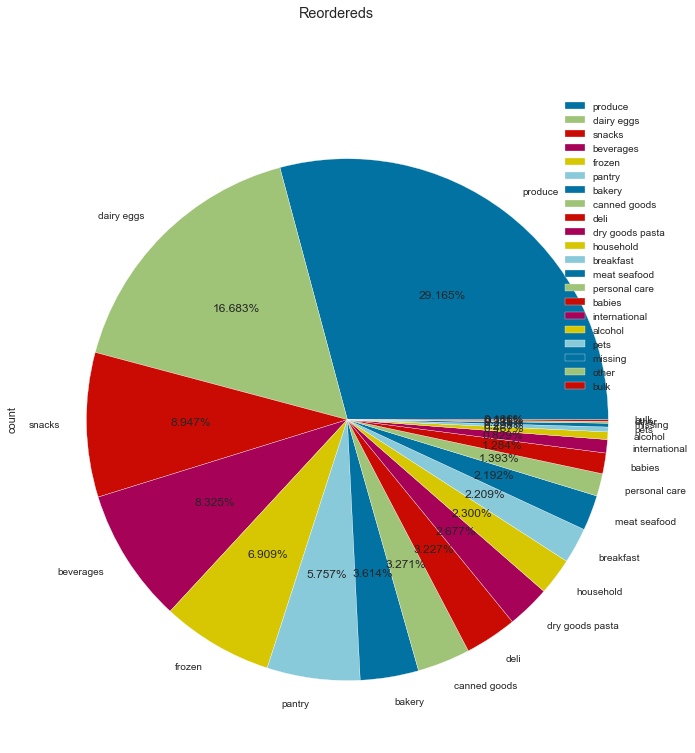

In [31]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie', title='Reordereds', subplots=True, autopct='%1.3f%%',figsize = (12,12))
plt.savefig('7')

 we can see that Produce, Dairy Eggs are the two most popular departments

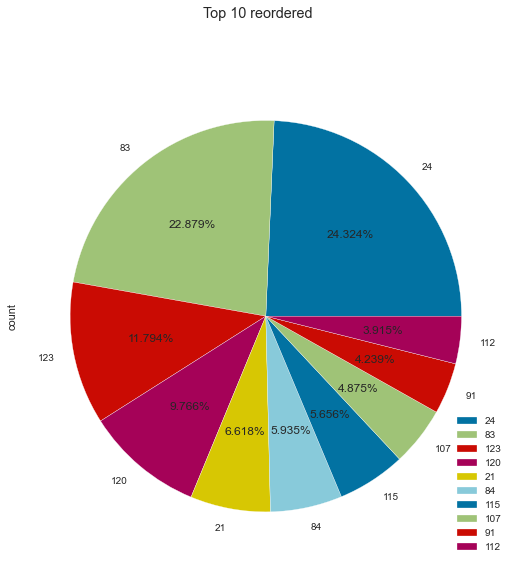

In [32]:
df.groupby('product_id')['reordered'].agg(['count']).sort_values(by='count',ascending=False).head(10).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Top 10 reordered',figsize=(9,9))
plt.savefig('8')

As you can see Fresh fruits (id = 24), Fresh vegetables (id = 83) the two most reordered products.

In [37]:
print('number of product id:' , df['product_id'].nunique())
print('number of product:', df['product_name'].nunique())
print('number of department id:' , df['department_id'].nunique())
print('number of department :' , df['department'].nunique())

number of product id: 134
number of product: 134
number of department id: 21
number of department : 21


it seems that each product and department have unique id.so we drop them.

In [6]:
#drop unimportant feature
df.drop(['order_id', 'user_id', 'order_number', 'product_name', 'department', 'order_time_list', 'order_number_group'], axis = 1, inplace = True)

In [39]:
df.head()

,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
0,2,18,0.0,17,1,0,13
1,2,18,0.0,91,2,0,16
2,2,18,0.0,36,3,0,16
3,2,18,0.0,83,4,0,4
4,2,18,0.0,83,5,0,4


# scale data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# K means algorithm

### K = 3

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [16]:
kmeans = KMeans(n_clusters= 3, n_init="auto" )
kmeans.fit(data_scaled)

KMeans(n_clusters=3, n_init='auto')

In [17]:
kmeans.cluster_centers_

array([[ 0.00140465,  0.00416015, -0.01095596, -1.19075743, -0.03986639,
         0.02001451, -0.31860684],
       [-0.01091315,  0.0053467 ,  0.00672992,  0.77319231,  0.00187208,
         0.03336867, -0.88325243],
       [ 0.00750744, -0.00829598,  0.00498039,  0.50746249,  0.03645382,
        -0.04610899,  1.01935381]])

In [18]:
kmeans.labels_

array([0, 2, 0, ..., 0, 0, 1])

### k = 4

In [19]:
kmeans = KMeans(n_clusters= 4,n_init="auto")
kmeans.fit(data_scaled)

KMeans(n_clusters=4, n_init='auto')

In [20]:
kmeans.cluster_centers_

array([[-3.87045553e-02,  3.78625710e-02,  1.87413824e+00,
         1.29475967e-02,  7.46502315e-02, -3.07238301e-01,
        -1.05913771e-02],
       [ 2.08250637e-02,  1.96572234e-02, -5.04249773e-01,
        -7.52444365e-03,  1.50390833e-01, -1.19852081e+00,
         5.16275174e-02],
       [-1.21813068e-03, -1.64557856e-02, -3.18715217e-01,
        -1.21475959e-01, -1.53562841e-01,  8.34059166e-01,
        -8.92965867e-01],
       [ 1.60762757e-03, -3.43221152e-02, -3.01488499e-01,
         1.48259633e-01, -7.16674292e-02,  8.34059166e-01,
         1.02247966e+00]])

In [21]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

# Elbow method 

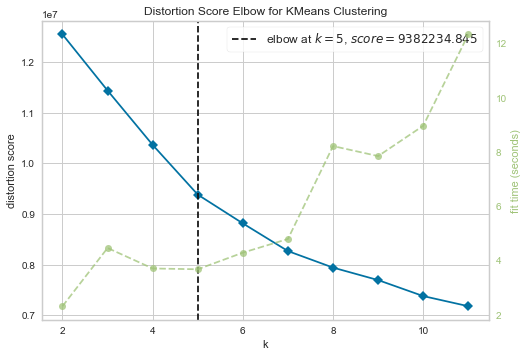

In [77]:
#check for number of optimal clusters
# ploting the Elbow method 

kmeans = KMeans(n_init='auto')
visualiser = KElbowVisualizer(kmeans, k=(2,12))
visualiser.fit(data_scaled)        
visualiser.show();

 From the above plot we can choose 5 number of clusters

# Silhouette_score

In [67]:
silhouette = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data_scaled)
    labels = kmeans.fit_predict(data_scaled)
    silhouette.append(silhouette_score(data_scaled, labels, sample_size=10000))

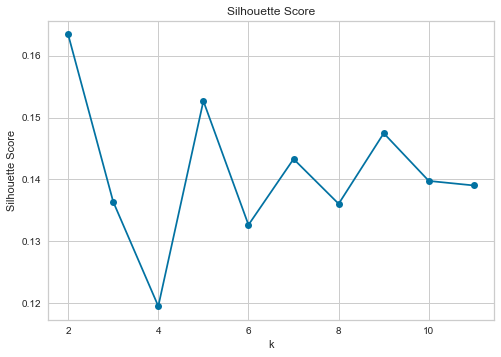

In [68]:
# Plot the silhouette score
plt.plot(range(2, 12), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


The plot above also shows that the silhouette score of 5 clusters gives more confidence to our choice.

So k = 5 is the optimal number of clusters 

In [78]:
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(data_scaled)

KMeans(n_clusters=5, n_init='auto')

In [79]:
kmeans.cluster_centers_

array([[-0.07436904, -0.00593324, -0.38593064,  0.81149324, -0.02622584,
         0.14374745, -0.88860633],
       [-0.04191214,  0.04281636,  1.88296183,  0.00793943,  0.07966824,
        -0.2857785 , -0.0127079 ],
       [ 1.04647648,  0.01158094, -0.40512382,  0.1342362 ,  0.06705182,
        -0.21433304,  0.88639652],
       [-0.00280022,  0.0037046 , -0.37276368, -1.1604202 , -0.12792071,
         0.1446643 , -0.82351782],
       [-0.78382458, -0.04090614, -0.34982058,  0.14016022,  0.03383347,
         0.11136568,  1.02098131]])

In [80]:
kmeans_labels = kmeans.labels_

# PCA

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42)
data_scaled_pca = pca.fit_transform(data_scaled)

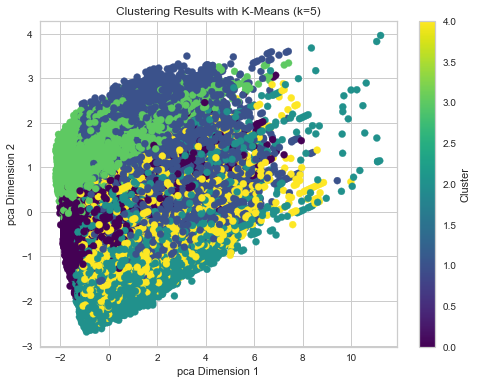

In [82]:
#Ploting the clusters in 2D using PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('pca Dimension 1')
plt.ylabel('pca Dimension 2')
plt.title('Clustering Results with K-Means (k={})'.format(5))
plt.colorbar(label='Cluster')
plt.show()

In [83]:
pca = PCA(n_components = 3, random_state = 42)
data_scaled_pca = pca.fit_transform(data_scaled)

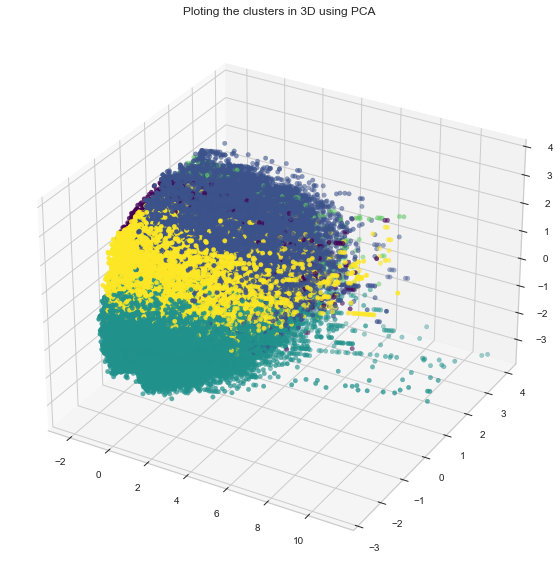

In [85]:
# Ploting the clusters in 3D using PCA 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111, projection='3d')
plt.title('Ploting the clusters in 3D using PCA')
ax.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1], data_scaled_pca[:, 2], c=kmeans_labels, cmap='viridis')
plt.show()

# Hierarchical clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering

num_sample = 10000 
sampled_data = data_scaled[np.random.choice(data_scaled.shape[0], num_sample , replace=False), :]
n_clusters = 5
Agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
Agg_labels = Agg_clustering.fit_predict(sampled_data)


Agg_silhouette = silhouette_score(sampled_data, Agg_labels)
print("Silhouette Score:", Agg_silhouette)

Silhouette Score: 0.11126293060017815


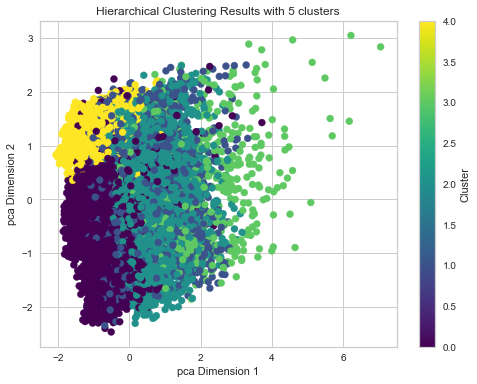

In [45]:
pca = PCA(n_components = 2, random_state = 42)
data_scaled_pca = pca.fit_transform(sampled_data)

#Ploting the clusters in 2D using PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1], c=Agg_labels, cmap='viridis')
plt.xlabel('pca Dimension 1')
plt.ylabel('pca Dimension 2')
plt.title('Hierarchical Clustering Results with {} clusters'.format(n_clusters))
plt.colorbar(label='Cluster')
plt.show()

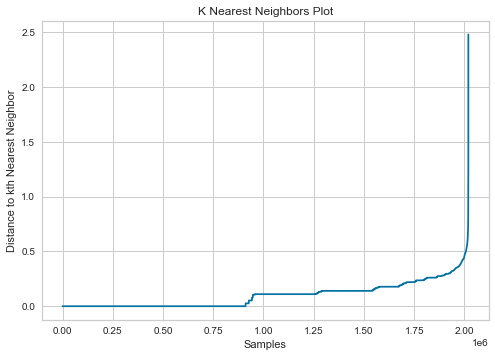

In [12]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Find the optimal value for eps using k nearest neighbors plot
k = 4  # Specify the value of k for nearest neighbors
nn = NearestNeighbors(n_neighbors=k)
nn.fit(data_scaled)
distances, _ = nn.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Consider the distances to the nearest neighbors (excluding the sample itself)
plt.plot(distances)
plt.xlabel('Samples')
plt.ylabel('Distance to kth Nearest Neighbor')
plt.title('K Nearest Neighbors Plot')
plt.show()

In [40]:
from sklearn.cluster import DBSCAN
min_samples = 3
eps=0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(sampled_data)
dbscan_labels = dbscan.fit_predict(sampled_data)

dbscan_silhouette = silhouette_score(sampled_data, dbscan_labels)
print("Silhouette Score:", dbscan_silhouette)

Silhouette Score: -0.45596879081074465


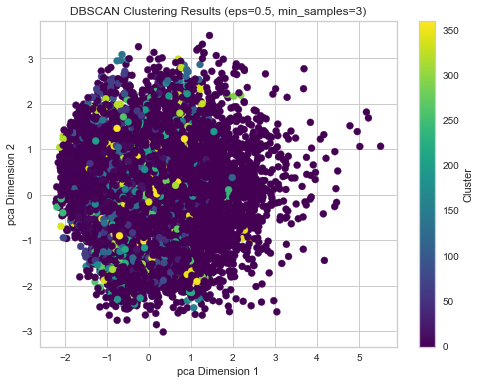

In [41]:
pca = PCA(n_components = 2, random_state = 42)
data_scaled_pca = pca.fit_transform(sampled_data)

#Ploting the clusters in 2D using PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('pca Dimension 1')
plt.ylabel('pca Dimension 2')
plt.title('DBSCAN Clustering Results (eps={}, min_samples={})'.format(eps, min_samples))
plt.colorbar(label='Cluster')
plt.show()

# PCA before training

In [91]:
num_pc = data_scaled.shape[1] 
pca = PCA(n_components=num_pc)
pca.fit(data_scaled)
data_scaled_pca = pca.transform(data_scaled)

In [92]:
print('Total variance in the dataset : {}'.format(sum(pca.explained_variance_)))
print('The 95% of the total variance : {}'.format(sum(pca.explained_variance_) * 0.95))

Total variance in the dataset : 7.0000034662086605
The 95% of the total variance : 6.650003292898227


In [101]:
component_var = zip(range(1, 11), pca.explained_variance_)
component_var = pd.DataFrame(component_var, columns=['# of Components', 'Explained Variance'])
component_var['Explained Variance'] = [sum(component_var['Explained Variance'][:i+1]) for i in range(num_pc)]
component_var

,# of Components,Explained Variance
0,1,1.169140
1,2,2.222032
2,3,3.247928
3,4,4.247651
4,5,5.209861
5,6,6.140713
6,7,7.000003


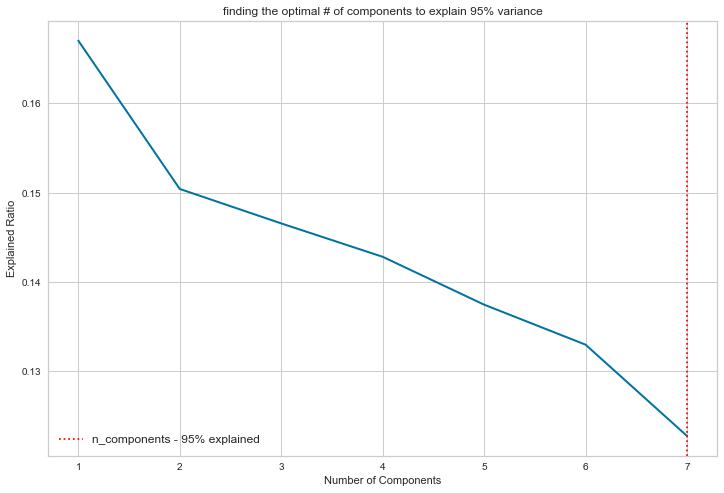

In [105]:
plt.figure(1, figsize=(12, 8))
plt.plot(range(1,8), pca.explained_variance_ratio_, linewidth=2, c="b")
plt.xlabel('Number of Components')
plt.ylabel('Explained Ratio')
plt.xticks(range(1,8))
plt.title('finding the optimal # of components to explain 95% variance')
plt.axvline(7,linestyle=':', label='n_components - 95% explained', c ="red")
plt.legend(prop=dict(size=12))

plt.show()

In [107]:
pca = PCA(n_components=7)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)

silhouette = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pca_data)
    labels = kmeans.fit_predict(pca_data)
    silhouette.append(silhouette_score(pca_data, labels, sample_size=10000))

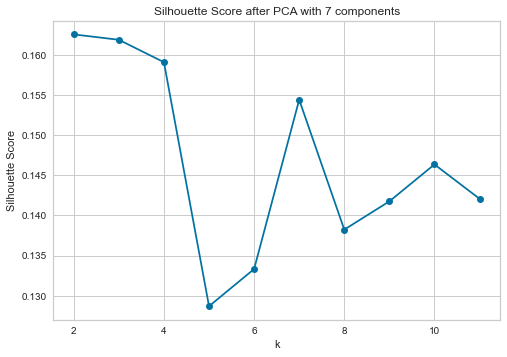

In [108]:
plt.plot(range(2, 12), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score after PCA with 7 components')
plt.show()


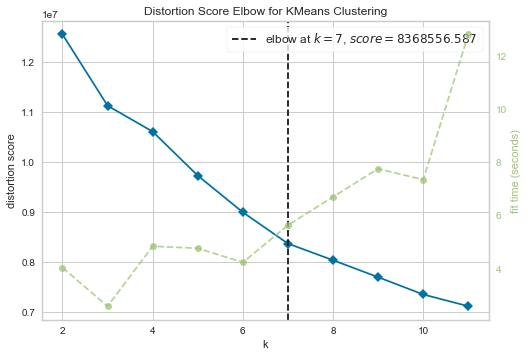

In [112]:
kmeans = KMeans(n_init='auto')
visualiser = KElbowVisualizer(kmeans, k=(2,12))
visualiser.fit(pca_data)        
visualiser.show();

In [113]:
kmeans = KMeans(n_clusters=7, n_init='auto')
kmeans.fit(pca_data)

KMeans(n_clusters=7, n_init='auto')

In [114]:
# assigning cluster labels to the data points in the dataset
clusters = kmeans.labels_
df['cluster'] = clusters 

In [115]:
df.head()

,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,cluster
0,2,18,0.0,17,1,0,13,2
1,2,18,0.0,91,2,0,16,2
2,2,18,0.0,36,3,0,16,2
3,2,18,0.0,83,4,0,4,2
4,2,18,0.0,83,5,0,4,2
